In [16]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


In [17]:
TC= pd.read_csv("GlobalLandTemperaturesByCountry.csv", encoding='ISO-8859-1')
TC=TC.dropna()
TC['dt'] = pd.to_datetime(TC['dt'])
unique_count = TC['Country'].nunique()
print(unique_count)
TC_6013=TC.drop(TC[TC['dt'] < "1960-01-01" ].index)
TC_6013.set_index("dt", inplace=True)
print(TC_6013.loc["1975-02-01"])
print(TC_6013["Country"].unique())



242
            AverageTemperature  AverageTemperatureUncertainty         Country
dt                                                                           
1975-02-01              -0.003                          0.467          Ãland
1975-02-01               2.315                          0.302     Afghanistan
1975-02-01              22.300                          0.200          Africa
1975-02-01               3.341                          0.523         Albania
1975-02-01              14.014                          0.457         Algeria
...                        ...                            ...             ...
1975-02-01              24.609                          0.324  Virgin Islands
1975-02-01              18.367                          0.430  Western Sahara
1975-02-01              22.147                          1.202           Yemen
1975-02-01              22.212                          0.278          Zambia
1975-02-01              22.837                          0.22

            AverageTemperature  AverageTemperatureUncertainty  Country
dt                                                                    
1960-01-01              10.787                          0.579  Tunisia
1960-02-01              14.914                          0.912  Tunisia
1960-03-01              16.294                          0.163  Tunisia
1960-04-01              17.377                          0.788  Tunisia
1960-05-01              23.370                          0.651  Tunisia


<AxesSubplot:xlabel='dt'>

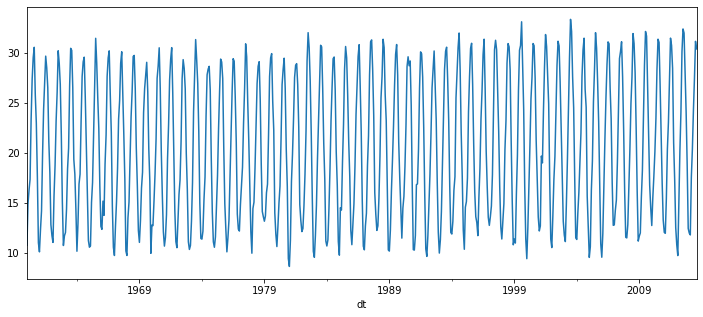

In [18]:
from statsmodels.tsa.arima.model import ARIMA
#TRY WITH A DATASET ONLY FOR TUNISIA
TUN_TC= TC_6013[TC_6013["Country"]=="Tunisia"]
print(TUN_TC.head())
TUN_TC["AverageTemperature"].plot(figsize=(12,5))

In [19]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(TUN_TC['AverageTemperature'])


1. ADF :  -3.4628664447294013
2. P-Value :  0.0089935748394363
3. Num Of Lags :  19
4. Num Of Observations Used For ADF Regression: 624
5. Critical Values :
	 1% :  -3.440873084361836
	 5% :  -2.866182929627575
	 10% :  -2.5692425987220577


In [20]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
stepwise_fit = auto_arima(TUN_TC['AverageTemperature'], trace=True, suppress_warnings=True)
stepwise_fit.summary()
best_model_params = stepwise_fit.get_params()
order = best_model_params['order']
print(order)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=4329.039, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=3512.848, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=3681.831, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5792.536, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=2723.196, Time=0.15 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=2517.050, Time=0.25 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=2440.413, Time=0.38 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=2373.549, Time=0.84 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=2381.496, Time=0.80 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=2379.057, Time=0.96 sec
 ARIMA(4,0,2)(0,0,0)[0] intercept   : AIC=2422.017, Time=0.93 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=2415.443, Time=0.78 sec
 ARIMA(5,0,2)(0,0,0)[0] intercept   : AIC=2

In [21]:
print(TUN_TC.shape)
train=TUN_TC.iloc[:-30]
test=TUN_TC.iloc[-30:]
print(train.shape,test.shape)
model=ARIMA(train['AverageTemperature'],order=order)
model=model.fit()
model.summary()




(644, 3)
(614, 3) (30, 3)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:     AverageTemperature   No. Observations:                  614
Model:                 ARIMA(4, 0, 1)   Log Likelihood               -1123.375
Date:                Mon, 24 Jul 2023   AIC                           2260.749
Time:                        13:56:03   BIC                           2291.689
Sample:                    01-01-1960   HQIC                          2272.781
                         - 02-01-2011                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.4954      0.065    313.427      0.000      20.367      20.624
ar.L1          1.3640      0.074     18.442      0.000       1.219       1.509
ar.L2         -0.5426      0.093     -5.841      0.000      -0.725      -0.361
ar.L3         -0.0617      0.073     -0.840      0.401      -0.206       0.082
ar.L4         -0.1640      0.060     -2.732      0.006      -0.282      -0.046
ma.L1         -0.5708      0.066     -8.663      0.000      -0.700      -0.442
sigma2         2.2525      0.135     16.693      0.000       1.988       2.517
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 1.03
Prob(Q):                              0.68   Prob(JB):                         0.60
Heteroskedasticity (H):               1.03   Skew:                            -0.08
Prob(H) (two-sided):                  0.85   Kurtosis:                         2.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

dt
2011-03-01    14.647347
2011-04-01    18.839324
2011-05-01    23.315876
2011-06-01    26.998491
2011-07-01    28.896870
2011-08-01    28.524474
2011-09-01    26.025056
2011-10-01    22.096677
2011-11-01    17.805966
2011-12-01    14.300022
2012-01-01    12.498152
2012-02-01    12.851631
2012-03-01    15.231501
2012-04-01    18.972145
2012-05-01    23.056980
2012-06-01    26.394442
2012-07-01    28.109391
2012-08-01    27.772257
2012-09-01    25.506004
2012-10-01    21.944469
2012-11-01    18.055545
2012-12-01    14.878441
2013-01-01    13.246245
2013-02-01    13.567785
2013-03-01    15.725841
2013-04-01    19.116846
2013-05-01    22.819255
2013-06-01    25.843704
2013-07-01    27.397142
2013-08-01    27.090474
Name: ARIMA Predictions, dtype: float64


<AxesSubplot:xlabel='dt'>

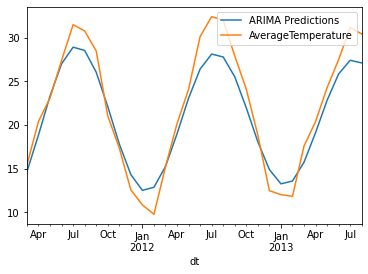

In [22]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.index=TUN_TC.index[start:end+1]
print(pred)
pred.plot(legend=True)
test['AverageTemperature'].plot(legend=True)

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['AverageTemperature'].mean()
rmse=sqrt(mean_squared_error(pred,test['AverageTemperature']))
print(rmse)


2.206838199953309


DatetimeIndex(['2013-09-01', '2013-10-01', '2013-11-01', '2013-12-01',
               '2014-01-01', '2014-02-01', '2014-03-01', '2014-04-01',
               '2014-05-01', '2014-06-01',
               ...
               '2030-03-01', '2030-04-01', '2030-05-01', '2030-06-01',
               '2030-07-01', '2030-08-01', '2030-09-01', '2030-10-01',
               '2030-11-01', '2030-12-01'],
              dtype='datetime64[ns]', length=208, freq='<DateOffset: months=1>')
            AverageTemperature  AverageTemperatureUncertainty  Country
2013-09-01           27.776286                       2.206838  Tunisia
2013-10-01           22.736111                       2.206838  Tunisia
2013-11-01           16.846497                       2.206838  Tunisia
2013-12-01           12.911462                       2.206838  Tunisia
2014-01-01           11.509634                       2.206838  Tunisia
...                        ...                            ...      ...
2030-08-01           30.281007  

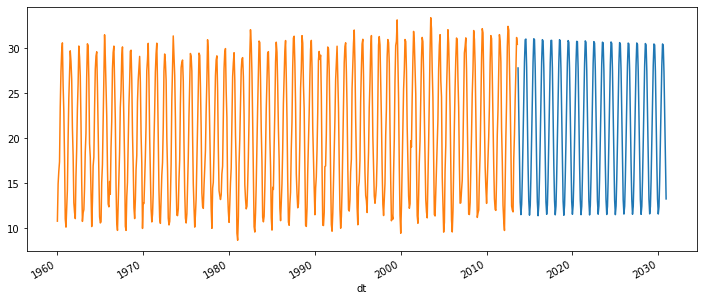

In [24]:
#TO PREDICT FUTURE VALUES
model2=ARIMA(TUN_TC['AverageTemperature'],order=(12,0,13))
model2=model2.fit()
TUN_TC.tail()
index_future_dates=pd.date_range(start='2013-09-01',end='2030-12-01',freq=pd.DateOffset(months=1))
print(index_future_dates)
pred2=model2.predict(start=len(TUN_TC),end=len(TUN_TC)+len(index_future_dates)- 1,typ='levels').rename('AverageTemperature')
pred2.index=index_future_dates
pred2 = pred2.to_frame()

#print(pred2)
plt.plot(pred2.index, pred2.values, label='ARIMA Predictions')
TUN_TC["AverageTemperature"].plot(figsize=(12,5))

pred2["AverageTemperatureUncertainty"]=[rmse for _ in range(len(pred2))]
pred2["Country"]=["Tunisia" for _ in range(len(pred2))]
TC_6013 = pd.concat([TC_6013, pred2])
print(pred2)
print(TC_6013[TC_6013["Country"]=="Tunisia"])
pred2.to_csv('pred2.csv', index=True)